### 案例分析：客户精准营销(RFM模型)
>本案例用具体实例的方式，在RFM的基础上构建客户价值分析模型，探讨如何对客户群体进行细分，以及细分后如何进行客户价值分析。最终得到LRFMC模型，并将客户群体细分为重要保持客户、重要发展客户、重要挽留客户、一般客户、低价值客户五类。

一、背景与目标 

1.1 背景

在面向客户制定运营策略、营销策略时，我们希望能够针对不同的客户推行不同的策略，实现精准化运营，以期获取最大的转化率。精准化运营的前提是客户关系管理，而客户关系管理的核心是客户分类。

**通过客户分类，对客户群体进行细分，区别出低价值客户、高价值客户，对不同的客户群体开展不同的个性化服务，将有限的资源合理地分配给不同价值的客户，实现效益最大化。**

在客户分类中，RFM模型是一个经典的分类模型，模型利用通用交易环节中最核心的三个维度——最近消费(Recency)、消费频率(Frequency)、消费金额(Monetary)细分客户群体，从而分析不同群体的客户价值。在某些商业形态中，客户与企业产生连接的核心指标会因产品特性而改变。如券商产品中，以上三项指标可以相应地变为如下三项：最近一次股票交易、交易频率、交易金额。

1.2 目标

本实例借助某证券公司客户数据，探讨如何利用KMeans算法对客户群体进行细分，以及细分后如何利用RFM模型对客户价值进行分析，并识别出高价值客户。

在本实例中，主要希望实现以下三个目标：

- 借助证券公司客户数据，对客户进行群体分类；
- 对不同的客户群体进行特征分析，比较各细分群体的客户价值；
- 对不同价值的客户制定相应的运营策略。

二、分析过程 

2.1 分析思路

本实例的数据包含了2016年4月1日至2018年3月31日期间的客户数据，共有6万余条记录。分析中需要用到KMeans算法，且需要将数据分析的结果可视化，便于后期的结论分析。

数据的属性定义见下表所示：

| 属性类型 | 属性名称 | 属性说明 |
| :-----| ----: | :----: |
| 基本信息 |MEMBER_NO | 客户ID |
| 基本信息 |OPEN_DATE | 开户日期 |
| 基本信息 |GENDER | 性别 |
| 基本信息 |LEVEL | 级别 |
| 基本信息 |WORK_CITY | 工作地城市 |
| 基本信息 |WORK_PROVINCE | 工作地所在省 |
| 基本信息 |WORK_COUNTRY | 国家 |
| 基本信息 |AGE | 年龄 |
| 交易信息 |FIRST_TRADE_DATE | 第一次交易日期 |
| 交易信息 |LOAD_TIME | 观测窗口的结束时间 |
| 交易信息 |TRADE_COUNT | 交易次数 |
| 交易信息 |SUM_M | 总交易额 |
| 交易信息 |Topest | 最大交易金额 |
| 交易信息 |Rate | 佣金率 |

考虑到券商行业与一般商业形态的不同，决定在RFM模型的基础上，增加2个指标用于客户分群与价值分析，得到LRFMC模型：

- L（Length）

客户关系长度。客户开户日期至观测窗口结束日期的间隔。（单位：天）
- R（Recency）

R表示客户最近一次操作股票账户的时间间隔。理论上，最近一次账户交易时间越近的客户应该是比较好的客户，对提供即时的股票交易服务也最有可能会有反应。R指标主要刻画了客户对券商的关注程度。
- F（Frequency）

F表示客户在限定时间内交易股票的频率，交易频率越高的客户，其满意度和忠诚度也就越高。F指标主要刻画了客户对券商的忠诚度。
- M（Monetary）

M表示客户在限定时间内交易股票的平均金额。交易金额是所有数据库报告的支柱，直接反应了券商的盈利情况。M指标主要刻画了客户的交易力。
- C（Contribution）

C表示股票交易的贡献程度（交易佣金），即反映的是客户炒股对券商收入的贡献价值。

LRFMC模型以上述五个指标为替代变量，通过指标标准化和赋予权重来计算客户价值，然后根据客户价值来进行K-Means聚类分析，将客户分成不同的类别，作为券商精准营销的基础。

首先对原始数据进行探索，清洗异常记录，再根据上述公式将原始数据表变换得到LRFMC模型建模需要的新数据表，接着对新数据表的数据进行属性规约、数据变换、Python建模、结果分析，便能得到最终的结果。

总体思路与流程见下图：
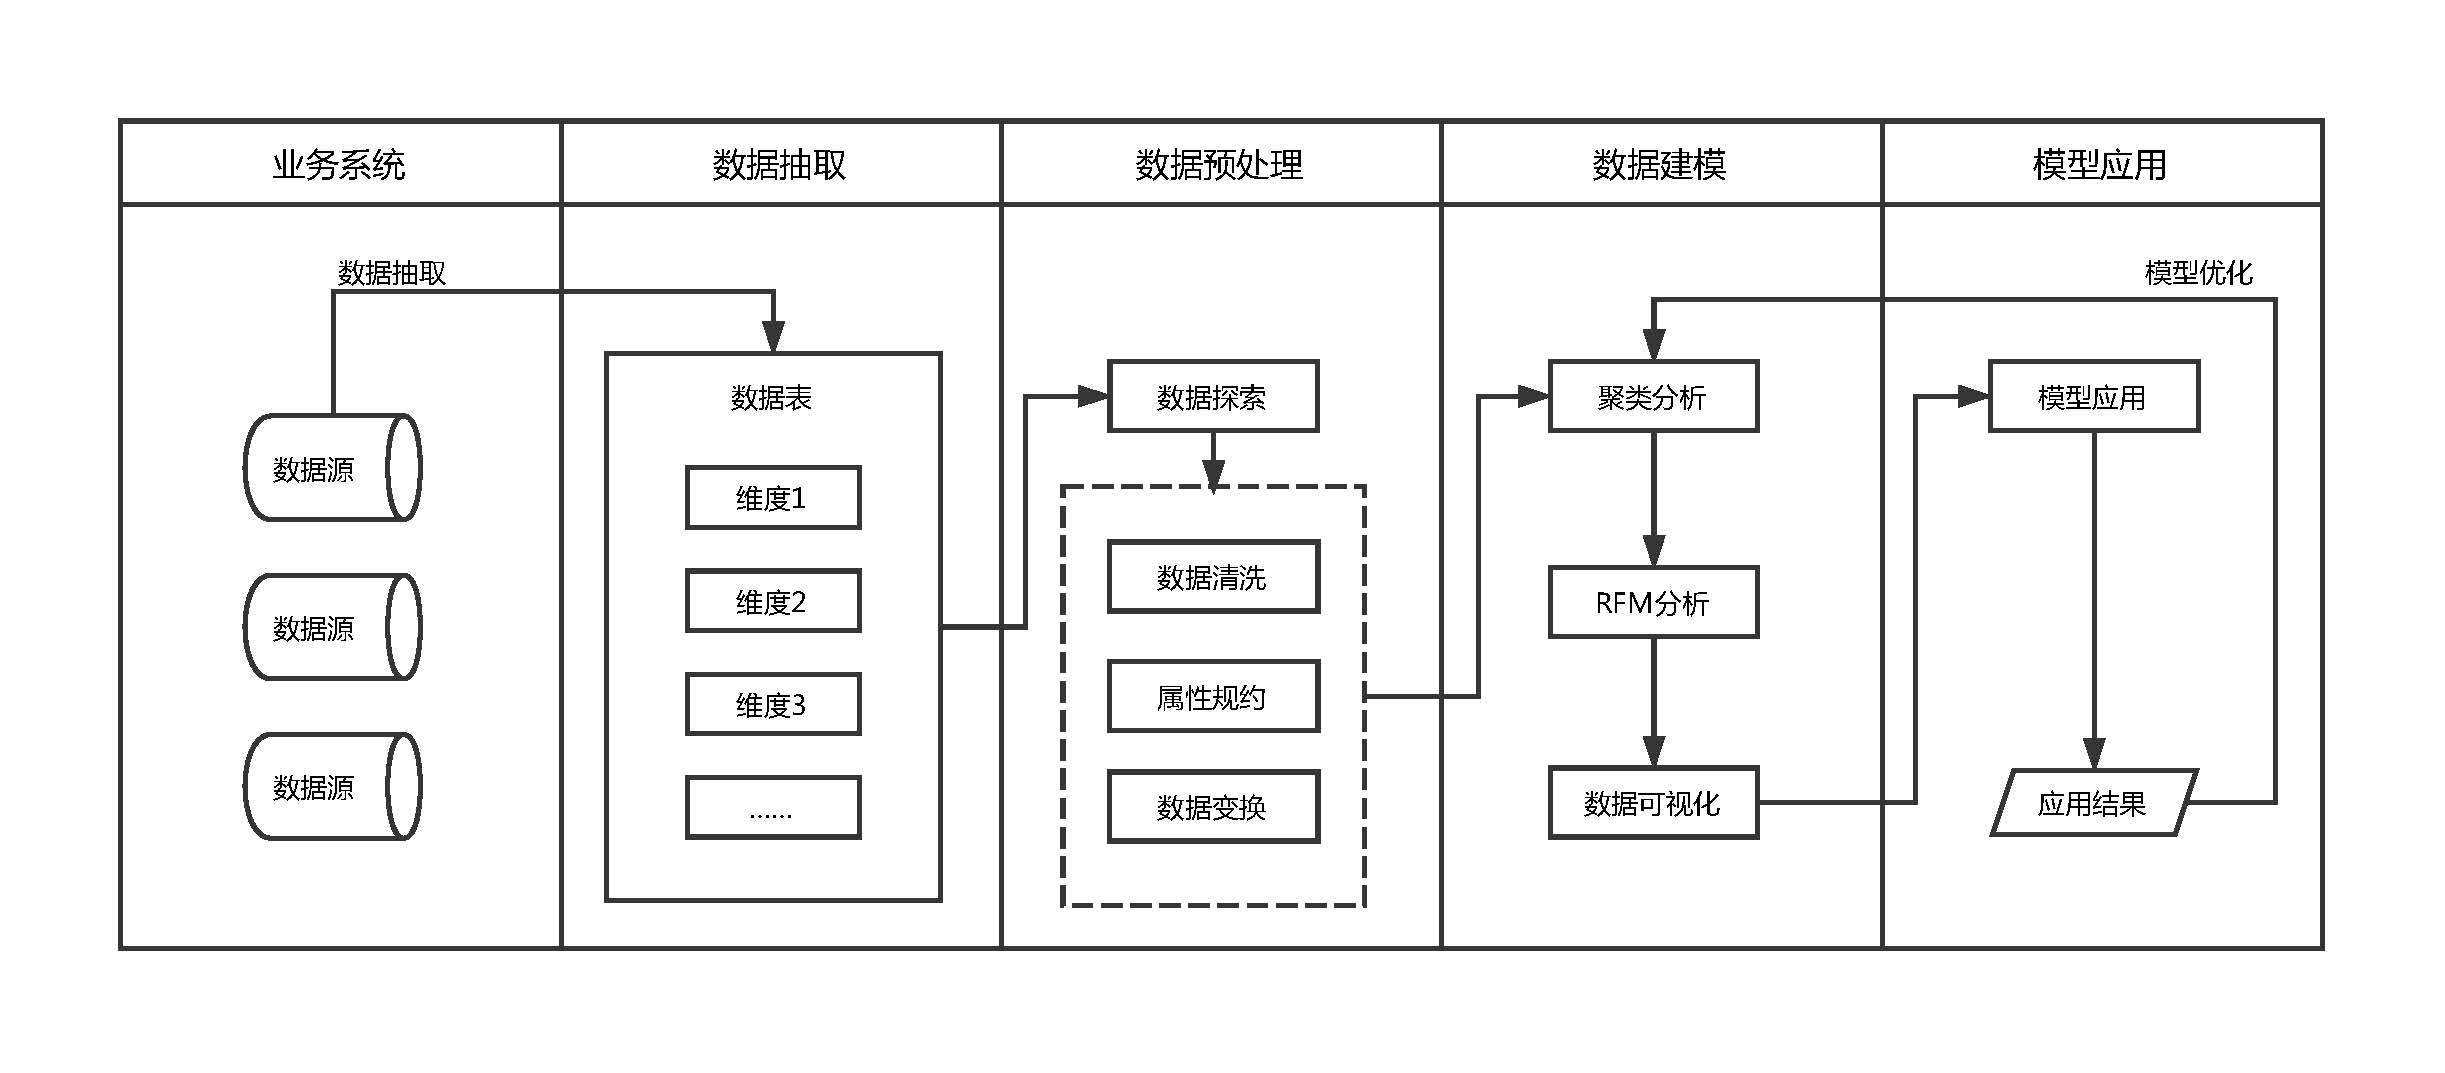

2.2 数据预处理

2.2.1 数据探索

In [1]:
import pandas as pd
import os
os.getcwd()
os.chdir("C:\\Users\\ShangFR\\Desktop\\eBrain\\RFM_demo")

In [2]:
data = pd.read_csv('data/stockholder_data_demo.csv', encoding='utf-8')  # 导入券商客户原始数据,指定UTF-8编码
data.head()

,MEMBER_NO,OPEN_DATE,FIRST_TRADE_DATE,GENDER,LEVEL,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,LOAD_TIME,TRADE_COUNT,SUM_M,Topest,Rate
0,11292,2009-08-28,2010-01-19,女,4,南京,江苏,CN,33.0,573,2018-03-30,24,393400,30775.0,0.25
1,20127,2008-12-06,2009-03-29,女,4,广州市,广东省,CN,41.0,12,2018-03-30,156,1092100,28148.0,0.60
2,28677,2016-02-18,2016-02-18,男,4,广州,广东,CN,37.0,25,2018-03-30,456,6386000,75183.0,0.70
3,55202,2011-03-28,2015-03-31,女,4,广州,广东,CN,65.0,3,2018-03-30,120,758000,21971.0,0.30
4,13545,2014-04-02,2014-04-02,男,4,广州,广东,CN,36.0,87,2018-03-30,60,824700,29683.0,0.20


In [3]:
explore = data.describe(include='all').T 
explore['null'] = len(data) - explore['count']  # 计算空值数
print(explore)

                  count unique         top   freq         mean          std  \
MEMBER_NO         62988    NaN         NaN    NaN      31494.5      18183.2   
OPEN_DATE         62988   3068  2015-01-12    184          NaN          NaN   
FIRST_TRADE_DATE  62988   3406  2017-02-15     96          NaN          NaN   
GENDER            62985      2           男  48134          NaN          NaN   
LEVEL             62988    NaN         NaN    NaN      4.10216     0.373856   
WORK_CITY         60719   3310          广州   9385          NaN          NaN   
WORK_PROVINCE     59740   1185          广东  17507          NaN          NaN   
WORK_COUNTRY      62962    118          CN  57748          NaN          NaN   
AGE               62568    NaN         NaN    NaN      42.4763      9.88591   
LAST_TO_END       62988    NaN         NaN    NaN       176.12      183.822   
LOAD_TIME         62988      1  2018-03-30  62988          NaN          NaN   
TRADE_COUNT       62988    NaN         NaN    NaN   

经过初步的数据探索，发现数据有几点特征：

共62988条记录，部分维度存在缺失值，WORK_CITY缺失2269条，Topest缺失689条。

2.2.2 数据清洗

此处主要清洗两类异常数据：

缺失值：交易额为null的数据；
异常值：交易额为0、佣金率不为0。

In [4]:
data_clean = data[data['Topest'].notnull()]  # 保留交易额非空值

term_1 = data_clean['Topest'] != 0
data_clean = data_clean[term_1]  # 去除异常值
data_clean.shape

(62299, 15)

2.2.3 属性规约

根据RFMT模型，选取与模型强相关的6个属性：'MEMBER_NO', 'OPEN_DATE', 'FIRST_TRADE_DATE','LOAD_TIME','TRADE_COUNT','LAST_TO_END','SUM_M', 'Topest','Rate'。删除其他冗余的、弱相关的属性，得到属性选择后的数据集。

In [5]:
data_model = data_clean[['MEMBER_NO', 'OPEN_DATE', 'FIRST_TRADE_DATE','LOAD_TIME','TRADE_COUNT','LAST_TO_END','SUM_M','Topest','Rate']]
data_model.shape

(62299, 9)

构建包含L、R、F、M、C五项指标的新数据表，并对应属性定义表，得到LRFMC模型中五项指标的计算公式：

- L = LOAD_TIME – OPEN_DATE. （观测窗口结束日期 – 开户日期）
- R = LAST_TO_END. （最后一次交易时间至观测窗口结束时长）
- F = TRADE_COUNT. （观测窗口内的交易次数）
- M = SUM_M. （观测窗口的交易金额）
- C = Rate. （佣金率）

利用2.2.3中的数据表计算得到变换后的数据表：

In [6]:
data_in = pd.DataFrame(columns=['L','R','F','M','C'])
tmp = {
    'L': pd.to_datetime(data_model['LOAD_TIME'])-pd.to_datetime(data_model['OPEN_DATE']),
    'R': data_model['LAST_TO_END'],
    'F': data_model['TRADE_COUNT'],
    'M': data_model['SUM_M'],
    'C': data_model['Rate']
}
data_in = pd.DataFrame(data = tmp, columns=['L','R','F','M','C'])
data_in.head()

,L,R,F,M,C
0,3136 days,573,24,393400,0.25
1,3401 days,12,156,1092100,0.60
2,771 days,25,456,6386000,0.70
3,2559 days,3,120,758000,0.30
4,1458 days,87,60,824700,0.20


从表中可以发现：每个指标的数据取值范围分布较广，为提高后续聚类分析的准确性，还需要将L、R、F、M、C五类数据进行标准化处理。标准化方法有极大极小标准化、标准差标准化等方法，此处采用标准差标准化的方法对数据进行处理。

In [7]:
data_Z = (data_in - data_in.mean(axis=0)) / (data_in.std(axis=0))  # 标准差标准化
data_Z.columns = ['Z' + i for i in data_Z.columns]
data_Z.head() # 标准差标准化后，得到包含ZL、ZR、ZF、ZM、ZT五项指标的数据集。

,ZL,ZR,ZF,ZM,ZC
0,1.944584,2.207757,-0.705461,-0.634587,-1.495605
1,2.257165,-0.886979,0.075143,-0.302256,0.416416
2,-0.845058,-0.815265,1.849243,2.215744,0.962708
3,1.263982,-0.936627,-0.137749,-0.461168,-1.222459
4,-0.034705,-0.473244,-0.492569,-0.429442,-1.768750


2.3 数据建模

客户价值分析模型构建主要分为两个部分：

1、利用K-Means算法对客户进行聚类分析，得到细分的客户群; 2、对细分的客户群进行特征分析，得到客户价值分析模型

2.3.1 聚类分析

用到K-means的聚类算法时，需要在数据集上找到最佳的聚类数。随着聚类数k的增大，样本划分会更加精细，每个簇的聚合程度会逐渐提高，那么误差平方和SSE自然会逐渐变小。在对簇的划分中，我们就使用了SSE作为目标函数来划分簇。当KMeans算法训练完成后，我们可以通过使用inertia属性来获取簇内的误方差，不需要再次进行计算。

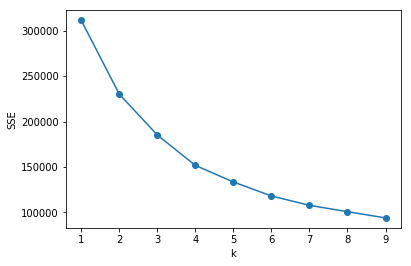

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
#利用SSE选择k
SSE = []  # 存放每次结果的误差平方和
for k in range(1,10):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(data_Z)
    SSE.append(estimator.inertia_)
X = range(1,10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()


可以使用图形工具肘方法，根据簇的数量来可视化簇内误方差。通过图形可以直观的观察到k对于簇内误方差的影响。上图可见，采用K-Means聚类算法对客户数据进行分群，共分为5类。

In [9]:
k = 5  # 聚类类别数目

# 调用k-means算法
model = KMeans(n_clusters=k, n_jobs=1)  # 输入聚类类别数目，n_jobs为并行数
model.fit(data_Z)  # 训练

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
model.cluster_centers_ # 聚类中心

array([[-0.29969311,  1.70605189, -0.5741016 , -0.53561873, -0.17306451],
       [ 1.17486948, -0.3767377 , -0.08337527, -0.08992665, -0.17158525],
       [-0.69533454, -0.41116361, -0.15871468, -0.15092565, -0.36229946],
       [ 0.48589331, -0.80159668,  2.4828294 ,  2.42436087,  0.31658133],
       [-0.1868815 , -0.09312816, -0.24117386, -0.27563661,  1.7733447 ]])

In [11]:
model.labels_ # 每个样本对应的簇类别标签
labels_out = pd.Series(model.labels_, name="labels", index=data_model.MEMBER_NO).to_frame()
labels_out.to_csv("result/labels_out.csv")
labels_out.head()

,labels
MEMBER_NO,
11292,0
20127,1
28677,3
55202,1
13545,2


In [12]:
r = pd.concat([data_Z, pd.Series(model.labels_, index=data_Z.index)], axis=1)   # 详细输出每个样本对应的类别
r.columns = list(data_Z.columns) + ['cluster']  # 重命名表头
r.index = data_model.MEMBER_NO
r.head()

,ZL,ZR,ZF,ZM,ZC,cluster
MEMBER_NO,,,,,,
11292,1.944584,2.207757,-0.705461,-0.634587,-1.495605,0
20127,2.257165,-0.886979,0.075143,-0.302256,0.416416,1
28677,-0.845058,-0.815265,1.849243,2.215744,0.962708,3
55202,1.263982,-0.936627,-0.137749,-0.461168,-1.222459,1
13545,-0.034705,-0.473244,-0.492569,-0.429442,-1.768750,2


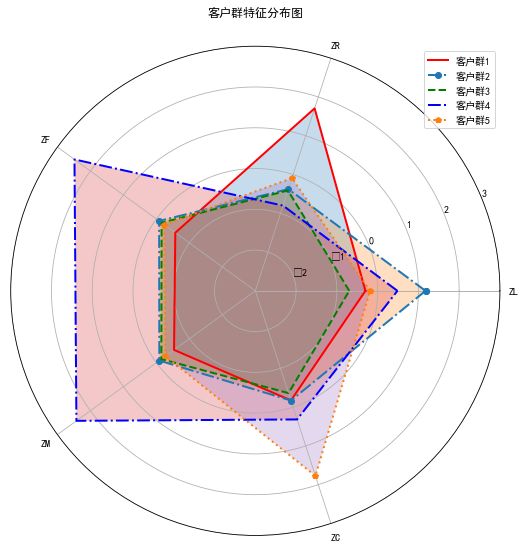

In [13]:
import numpy as np
# 中文字体显示设置
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

# kmodel.cluster_centers_：kmeans聚类后的聚类中心
N = len(model.cluster_centers_[0])  # 聚类中心的属性长度
angles=np.linspace(0, 2*np.pi, N, endpoint=False) # 设置雷达图的角度，用于平分切开一个圆面
angles=np.concatenate((angles, [angles[0]])) # 为了使雷达图一圈封闭起来
fig = plt.figure(figsize=(9,9)) # 设置画布大小
ax = fig.add_subplot(111, polar=True) # 这里一定要设置为极坐标格式
sam = ['r-', 'o-.', 'g--', 'b-.', 'p:'] # 样式
lab = [] # 图例标签名
for i in range(len(model.cluster_centers_)):
    values = model.cluster_centers_[i]
#     feature = ['ZF','ZC','ZR','ZL','ZM'] # 设置各指标名称
    feature = data_Z.columns
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    values=np.concatenate((values,[values[0]]))
    ax.plot(angles, values, sam[i], linewidth=2) # 绘制折线图
    ax.fill(angles, values, alpha=0.25) # 填充颜色
    ax.set_thetagrids(angles * 180/np.pi, feature) # 添加每个特征的标签
    ax.set_ylim(-3, 3) # 设置雷达图的范围
    plt.title('客户群特征分布图') # 添加标题
    ax.grid(True) # 添加网格线
    lab.append('客户群'+str(i+1))
plt.legend(lab)
plt.savefig("result/券商客户群特征分布图.jpg")  # 保存图片到本地
plt.show() # 显示图形

其中每项指标的实际业务意义为：

- L：开户的时长。越大代表顾客炒股时间越久
- R：最近一次交易时间。越大代表越久没炒股
- F：交易次数。越大代表炒股次数越多
- M：交易总金额。越大代表交易总金额越多
- C：单次交易的佣金。越大代表客户每笔交易贡献越大

同时针对业务需要，及参考RFM模型对客户类别的分类，定义五个等级的客户类别：

（1）重要保持客户

平均贡献率高(C↑)，最近有交易记录(R↓)，交易次数高(F↑)或交易金额大(M↑)
这类客户经常炒股，且资金实力雄厚，是最理想的客户类型，公司应优先将资源投放到他们身上，维持这类客户的忠诚度。

（2）重要发展客户

平均贡献率高(C↑)，最近有交易记录(R↓)，交易次数低(F↓)或交易金额少(M↓)
这类客户最近有交易记录，但交易金额低，具有很大的发展潜力，公司应加强这类客户的满意度，提供投资咨询服务，使他们逐渐成为忠诚客户。

（3）重要挽留客户

平均贡献率高(C↑)，交易次数高(F↑)或交易金额(M↑)，最近无交易记录(R↑)
这类客户总交易金额高，但较长时间没有交易，可能处于流失状态，公司应加强与这类客户的互动，召回用户，延长客户的生命周期。

（4）一般客户

平均贡献率适中(C↑)，最近无交易记录(R↑)，交易次数低(F↓)或交易金额少(M↓)，开户时间短(L↓)
这类客户最近无交易记录，炒股热情低，公司需要在资源支持的情况下强化对这类客户的联系

（5）低价值客户

平均贡献率低(C↓），最近无交易记录(R↑），交易次数低(F↓）且交易金额少(M↓)，开户时间短(L↓)
这类客户与一般客户类似，最近无交易记录，炒股热情低。

In [14]:
r1 = pd.Series(model.labels_).value_counts()  # 统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_)  # 找出聚类中心
r2['S'] = r2.apply(lambda x: sum(x * [0.05,0.13,0.32,0.40,0.10]), axis=1)     # 通过指标权重矩阵计算价值得分

cluster_count = pd.concat([r2, r1], axis=1)   # 得到聚类中心对应的类别下的数目
cluster_count.columns = list(data_Z.columns) + ['S'] + ['cluster_n'] 
cluster_count = cluster_count.sort_values(by=['S'], ascending=False)
print(cluster_count)

         ZL        ZR        ZF        ZM        ZC         S  cluster_n
3  0.485893 -0.801597  2.482829  2.424361  0.316581  1.715995       5373
4 -0.186881 -0.093128 -0.241174 -0.275637  1.773345 -0.031547       6421
1  1.174869 -0.376738 -0.083375 -0.089927 -0.171585 -0.070042      15509
0 -0.299693  1.706052 -0.574102 -0.535619 -0.173065 -0.208464      11871
2 -0.695335 -0.411164 -0.158715 -0.150926 -0.362299 -0.235607      23125


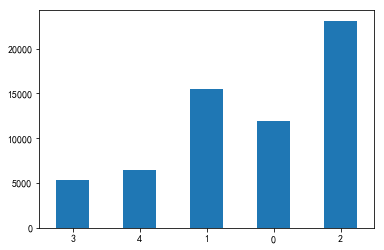

In [15]:
# cluster_count.set_index(r1.index, inplace=True)
cluster_count.cluster_n.plot.bar(rot=0)

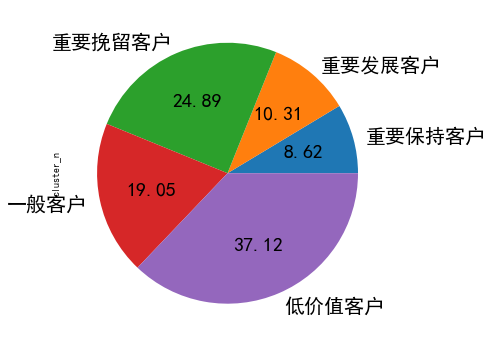

In [16]:
labels_out = labels_out.replace(cluster_count.index, [ '重要保持客户','重要发展客户',  '重要挽留客户', '一般客户','低价值客户'])
labels_out.to_csv("result/labels_out.csv")

ax = cluster_count.cluster_n.plot.pie(labels=['重要保持客户','重要发展客户',  '重要挽留客户', '一般客户','低价值客户'], autopct='%.2f', fontsize=20, figsize=(6, 6))
fig = ax.get_figure()
fig.savefig("result/券商客户群占比分布图.jpg")

### 分析：

- 重要保持客户、重要发展客户占比13.87%，不足两成，整体较少
- 一般客户、低价值客户占比60.37%，逾六成，整体偏多
- 重要挽留客户占比25.76%，四分之一，整体发挥空间大

按照20/80法则：一般而言企业的80%收入由头部20%的用户贡献。从上图中也能发现：忠诚的重要保留客户、重要发展客户必然贡献了企业收入的绝大部分，企业也需要投入资源服务好这部分客户。

同时，重要保持客户、重要发展客户、重要挽留客户这三类客户其实也对应着客户生命周期中的发展期、稳定器、衰退期三个时期。从客户生命周期的角度讲，也应重点投入资源召回衰退期的客户。

一般而言，数据分析最终的目的是针对分析结果提出并开展一系列的运营/营销策略，以期帮助企业发展。在本实例中，运营策略有三个方向：

- 提高活跃度：提高一般客户、低价值客户的活跃度。将其转化为优质客户
- 提高留存率：与重要挽留客户互动，提高这部分用户的留存率
- 提高付费率：维系重要保持客户、重要发展客户的忠诚度，保持企业良好收入

每个方向对应不同的策略，如降低佣金、账户积分兑换、交叉销售、提供咨询服务等手段。